In [1]:
pip install pandas openpyxl


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd


In [3]:
df = pd.read_excel('TITANIC.xlsx')


In [5]:
print(df.columns.tolist())


['survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone']


In [6]:
import pandas as pd

# Step 1: Read the Excel file (no header, because the first row is part of the data)
df_raw = pd.read_excel('Titanic.xlsx', header=None)

# Step 2: Split the single column (column 0) into multiple columns
df_split = df_raw[0].str.split(',', expand=True)

# Step 3: Set first row as header
df_split.columns = df_split.iloc[0]
df_clean = df_split.drop(index=0).reset_index(drop=True)

# Step 4: Optional — clean column names (remove spaces, lowercase)
df_clean.columns = df_clean.columns.str.strip().str.lower()

# Step 5: Convert 'survived' column to numeric (important, since it's still string)
df_clean['survived'] = pd.to_numeric(df_clean['survived'])

# Step 6: Calculate survival rate
survival_rate = df_clean['survived'].mean()
print(f"The survival rate of passengers is {survival_rate:.2%}")


The survival rate of passengers is 38.38%


In [ ]:
#what is the gender distribution of the passengers

In [7]:
# Convert relevant columns to numeric
numeric_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare']

for col in numeric_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Check data types to confirm
print(df_clean.dtypes)

# Look at first few rows again
print(df_clean.head())


0
survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male      object
deck            object
embark_town     object
alive           object
alone           object
dtype: object
0  survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

0    who adult_male deck  embark_town alive  alone  
0    man       True       Southampton    no  False  
1  woman      False    C    Cherbourg   yes  False  
2  woman      False    

In [8]:
gender_counts = df_clean['sex'].value_counts()
print(gender_counts)


sex
male      577
female    314
Name: count, dtype: int64


In [ ]:
#how does survival rate differ by class

In [9]:
# Group by class and calculate survival rate
survival_by_class = df_clean.groupby('pclass')['survived'].mean()

print(survival_by_class)


pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


In [ ]:
#what is the distribution of the passengers ages

In [10]:
df_clean['age'] = pd.to_numeric(df_clean['age'], errors='coerce')


In [11]:
print(df_clean['age'].describe())


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


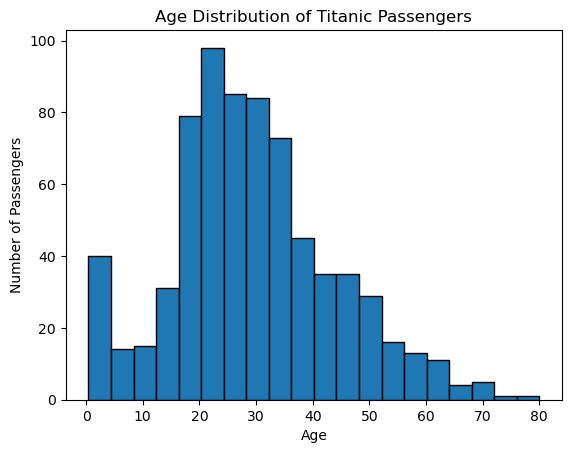

In [12]:
import matplotlib.pyplot as plt

plt.hist(df_clean['age'].dropna(), bins=20, edgecolor='black')
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()


In [ ]:
#how many passengers embarked from each location

In [13]:
embark_town_counts = df_clean['embark_town'].value_counts()
print(embark_town_counts)


embark_town
Southampton    644
Cherbourg      168
Queenstown      77
                 2
Name: count, dtype: int64


In [ ]:
#what is the average fair paid by class

In [14]:
# Make sure 'fare' column is numeric (important if any values are still strings)
df_clean['fare'] = pd.to_numeric(df_clean['fare'], errors='coerce')

# Group by class and calculate average fare
average_fare_per_class = df_clean.groupby('pclass')['fare'].mean()

print(average_fare_per_class)


pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64


In [15]:
#how does gender affect survival rate
survival_by_gender = df_clean.groupby('sex')['survived'].mean()

print(survival_by_gender)


sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


In [16]:
print((survival_by_gender * 100).round(2))


sex
female    74.20
male      18.89
Name: survived, dtype: float64


In [ ]:
#what is the correlation between fare and survival

In [17]:
df_clean['fare'] = pd.to_numeric(df_clean['fare'], errors='coerce')
df_clean['survived'] = pd.to_numeric(df_clean['survived'], errors='coerce')


In [18]:
correlation = df_clean['fare'].corr(df_clean['survived'])
print(f"Correlation between fare and survival: {correlation:.2f}")


Correlation between fare and survival: 0.26
